## Install packages

In [7]:
pip install torch git+https://github.com/pgmpy/pgmpy networkX tqdm joblib

  Cloning https://github.com/pgmpy/pgmpy to /tmp/pip-req-build-s_rjkyui
  Running command git clone -q https://github.com/pgmpy/pgmpy /tmp/pip-req-build-s_rjkyui
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 286kB 1.7MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-wh_zmrw_/wheels/d7/06/0d/60f9a453b74808512edfdce6bc326304383299e144120cbd00
Successfully built pgmpy
Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install -U git+https://github.com/zilleanai/zillean_client

  Cloning https://github.com/zilleanai/zillean_client to /tmp/pip-req-build-82p5yc5o
  Running command git clone -q https://github.com/zilleanai/zillean_client /tmp/pip-req-build-82p5yc5o
  Stored in directory: /tmp/pip-ephem-wheel-cache-khjzmfs5/wheels/15/ce/57/57c026d4f3ccecad59478ab6cd5088dc9c173b3a2d8f3da85e
Successfully built zillean-client
  Found existing installation: zillean-client 0.0.1
    Uninstalling zillean-client-0.0.1:
      Successfully uninstalled zillean-client-0.0.1
Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install git+https://github.com/zilleanai/zworkflow

  Cloning https://github.com/zilleanai/zworkflow to /tmp/pip-req-build-8445onxn
  Running command git clone -q https://github.com/zilleanai/zworkflow /tmp/pip-req-build-8445onxn
     |████████████████████████████████| 26.6MB 2.5MB/s 
     |████████████████████████████████| 266kB 2.5MB/s 
     |████████████████████████████████| 225kB 80.7MB/s 
     |████████████████████████████████| 142.8MB 2.2MB/s 
     |████████████████████████████████| 61kB 3.1MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-5eky_exb/wheels/c0/fb/71/6a621fa4245c1c666f486ba43b47a9db7bfafc0a5cd6355cc8
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
  Stored in directory: /home/jovyan/.cache/pip/wheels/d4/de/b5/88300d2adc973a7ec963b339d2935d34a0cf02c08b613a8a5e
  Stored in directory: /home/jovyan/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built zworkflow bayesian-optimization pyro-ppl opt-einsum
Note:

In [9]:
import pandas as pd

## Load available modules from the platform

In [201]:
import os
domain = 'backend:5000'
api_root = 'http://'+domain+'/api/v1/'
from zillean_client import load
load(api_root)

zillean_client
importing module: project
importing module: file
importing module: tag
importing module: csv
importing module: pgm


In [202]:
from zillean_client.project import project as projectapi
api = projectapi(project={'api_root': api_root, 'name': 'hillclimb'})
print(api.list())

[{'createdAt': '2019-07-24T19:59:00.478968+00:00', 'id': 1, 'name': 'pgm', 'updatedAt': '2019-07-24T19:59:00.478968+00:00'}, {'createdAt': '2019-07-25T05:53:05.555342+00:00', 'id': 2, 'name': 'hillclimb', 'updatedAt': '2019-07-25T05:53:05.555342+00:00'}]


## Load some data from a project on the platform

In [203]:
from zillean_client.file import file as fileapi
file_api = fileapi(project={'api_root': api_root, 'name': 'hillclimb'})
print('files:', file_api.files())

files: ['workflow.yml', 'ETH-USDT_2019-01-01T00:00:01_2019-01-01T06:00:01.gz', 'ETH-USDT_2019-02-01T06:00:00_2019-02-01T12:00:00.gz', 'ETH-USDT_2019-03-01T12:00:06_2019-03-01T18:00:06.gz', 'ETH-USDT_2019-04-01T07:30:34_2019-04-01T13:30:34.gz', 'ETH-USDT_2019-05-01T07:02:42_2019-05-01T13:02:42.gz', 'ETH-USDT_2018-12-06T12:00:00_2018-12-06T18:00:00.gz', 'database.db', 'label.py', 'dd05ddc1-b8dd-4121-b00e-cf31fac5009d_pgm.json', 'dd05ddc1-b8dd-4121-b00e-cf31fac5009d_distributions.json', 'model.py']


In [204]:
%%time
from zillean_client.csv import csv as csvapi
csv_api = csvapi(project={'api_root': api_root, 'name': 'hillclimb'})
print('csvs:', csv_api.list())
df = csv_api.download(csv_api.list()[0])

csvs: ['ETH-USDT_2019-01-01T00:00:01_2019-01-01T06:00:01.gz', 'ETH-USDT_2019-02-01T06:00:00_2019-02-01T12:00:00.gz', 'ETH-USDT_2019-03-01T12:00:06_2019-03-01T18:00:06.gz', 'ETH-USDT_2019-04-01T07:30:34_2019-04-01T13:30:34.gz', 'ETH-USDT_2019-05-01T07:02:42_2019-05-01T13:02:42.gz', 'ETH-USDT_2018-12-06T12:00:00_2018-12-06T18:00:00.gz']
CPU times: user 28.3 ms, sys: 8 µs, total: 28.3 ms
Wall time: 121 ms


# Load Config

In [258]:
import yaml
from zworkflow import Config
config_file = file_api.download("workflow.yml")
config = Config(yaml.load(config_file, Loader=yaml.FullLoader))

## Train Structure

In [259]:
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore


In [260]:
data = df[list(config['dataset']['features'])]
data = (data*10)[:1500].dropna().astype(int)
est = HillClimbSearch(data, scoring_method=BicScore(data))

In [261]:
%%time
best_model = est.estimate(max_indegree=2)

CPU times: user 40.1 s, sys: 32 ms, total: 40.1 s
Wall time: 40.1 s


In [262]:
sorted(best_model.nodes())

['action',
 'ask_price_0',
 'ask_quantity_0',
 'bid_price_0',
 'bid_quantity_0',
 'price']

In [263]:
best_model.edges()

OutEdgeView([('price', 'ask_price_0'), ('bid_price_0', 'price')])

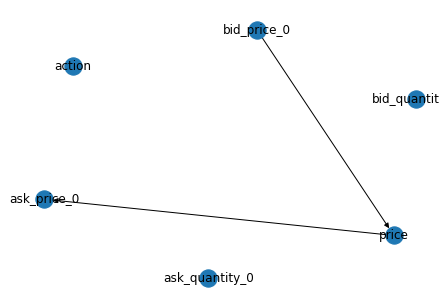

In [264]:
nx.draw(best_model, with_labels=True)
plt.show()

# predict some data

In [265]:
from pgmpy.models import BayesianModel
pgm = BayesianModel(best_model.edges())

In [266]:
%%time
train_data = data[:1000]
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
pgm.fit(train_data, estimator=MaximumLikelihoodEstimator)

CPU times: user 42.1 ms, sys: 27.6 ms, total: 69.7 ms
Wall time: 31.8 ms


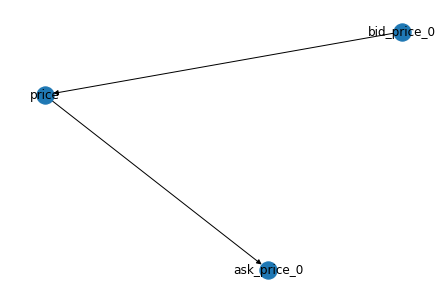

In [267]:
nx.draw(pgm, with_labels=True)
plt.show()

In [268]:
predict_data = data[1000:1015][list(pgm.nodes())]
predict_data = predict_data.copy()
predict_data.drop('price', axis=1, inplace=True)
y_prob = pgm.predict_probability(predict_data)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

In [269]:
y_prob['price'] = data[1000:1015]['price']
y_prob

price_1311  price_1312  price_1313  price_1314  price_1315  price_1316  \
1010         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1011         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1012         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1013         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1014         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1015         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1016         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1017         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1018         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1019         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1020         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1021         0.0    0.017503    0.982497    0.000000         0.0         0.0   
1022         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1023         0.0    0.000000    0.447895    0.552105         0.0         0.0   
1024         0.0    0.000000    0.447895    0.552105         0.0         0.0   

      price_1317  price_1318  price_1319  price_1320  price_1321  price_1322  \
1010         0.0         0.0         0.0         0.0         0.0         0.0   
1011         0.0         0.0         0.0         0.0         0.0         0.0   
1012         0.0         0.0         0.0         0.0         0.0         0.0   
1013         0.0         0.0         0.0         0.0         0.0         0.0   
1014         0.0         0.0         0.0         0.0         0.0         0.0   
1015         0.0         0.0         0.0         0.0         0.0         0.0   
1016         0.0         0.0         0.0         0.0         0.0         0.0   
1017         0.0         0.0         0.0         0.0         0.0         0.0   
1018         0.0         0.0         0.0         0.0         0.0         0.0   
1019         0.0         0.0         0.0         0.0         0.0         0.0   
1020         0.0         0.0         0.0         0.0         0.0         0.0   
1021         0.0         0.0         0.0         0.0         0.0         0.0   
1022         0.0         0.0         0.0         0.0         0.0         0.0   
1023         0.0         0.0         0.0         0.0         0.0         0.0   
1024         0.0         0.0         0.0         0.0         0.0         0.0   

      price  
1010   1313  
1011   1313  
1012   1313  
1013   1314  
1014   1313  
1015   1313  
1016   1313  
1017   1313  
1018   1313  
1019   1314  
1020   1314  
1021   1314  
1022   1313  
1023   1313  
1024   1313